# HW4#3 Percepton|

In [2]:
import csv
import numpy 
import scipy
from copy import deepcopy
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import random
import math


# Import Data and split train and test

In [3]:
data_list=[]
data=pd.read_csv('/Users/wendy/Documents/2017 Fall/CS 534/HW4/spamAssassin.data',header=None)
for i in range(int(0.7*len(data))):
    data_list.append(data[0][i])
test_data=[]
for i in range(int(0.7*len(data)),len(data)):
    test_data.append(data[0][i])
print data_list[1]

1 have tax problem do you ow the ir monei if your debt is dollarnumb number us or more we can help our licens agent can help you with both past and present tax debt we have direct contact with the ir so onc your applic is process we can help you immedi without further delai also as our client we can offer you other servic and help with other problem our nation recogn tax attornei paraleg legal assist and licens enrol agent can help you with tax prepar audit seizur bank levi asset protect audit reconsider trust fund penalti defens penalti appeal penalti abat wage garnish and more to receiv free inform on tax help pleas fill out the form below and return it to us there ar no oblig and suppli inform is kept strictli confidenti pleas note that thi offer onli appli to us citizen applic process mai take up to number busi dai note for debt size pleas also includ ani penalti or interest full name nbsp nbsp state nbsp nbsp alabama alaska arizona arkansa california colorado connecticut delawar d

# Calculate word frequency

In [7]:
train=[]
for i in range(len(data_list)):
    train.append(data_list[i].split(' '))
print train[1]
test=[]
for i in range(len(test_data)):
    test.append(test_data[i].split(' '))
class_vote={}
for j in range(len(train)):
    for i in range(1,len(train[j])):
        if train[j][i] in class_vote:
            class_vote[train[j][i]]+=1
        else:
            class_vote[train[j][i]]=1
class_vote_key=list(class_vote.keys())
for i in class_vote_key:
    if class_vote[i]<30:
        del class_vote[i]

['1', 'have', 'tax', 'problem', 'do', 'you', 'ow', 'the', 'ir', 'monei', 'if', 'your', 'debt', 'is', 'dollarnumb', 'number', 'us', 'or', 'more', 'we', 'can', 'help', 'our', 'licens', 'agent', 'can', 'help', 'you', 'with', 'both', 'past', 'and', 'present', 'tax', 'debt', 'we', 'have', 'direct', 'contact', 'with', 'the', 'ir', 'so', 'onc', 'your', 'applic', 'is', 'process', 'we', 'can', 'help', 'you', 'immedi', 'without', 'further', 'delai', 'also', 'as', 'our', 'client', 'we', 'can', 'offer', 'you', 'other', 'servic', 'and', 'help', 'with', 'other', 'problem', 'our', 'nation', 'recogn', 'tax', 'attornei', 'paraleg', 'legal', 'assist', 'and', 'licens', 'enrol', 'agent', 'can', 'help', 'you', 'with', 'tax', 'prepar', 'audit', 'seizur', 'bank', 'levi', 'asset', 'protect', 'audit', 'reconsider', 'trust', 'fund', 'penalti', 'defens', 'penalti', 'appeal', 'penalti', 'abat', 'wage', 'garnish', 'and', 'more', 'to', 'receiv', 'free', 'inform', 'on', 'tax', 'help', 'pleas', 'fill', 'out', 'the', 

# Data transformation

In [5]:
train_list=[]
for sample in train:
    sample_list=[]
    if sample[0]=='0':
        sample_list.append(1)
    else:
        sample_list.append(-1)
    for i in class_vote:
        if i in sample:
            sample_list.append(1)
        else:
            sample_list.append(0)
    train_list.append(sample_list)
test_list=[]
for sample in test:
    sample_list=[]
    if sample[0]=='0':
        sample_list.append(1)
    else:
        sample_list.append(-1)
    for i in class_vote:
        if i in sample:
            sample_list.append(1)
        else:
            sample_list.append(0)
    test_list.append(sample_list)

In [6]:
train_array=numpy.array(train_list)
test_array=numpy.array(test_list)
trainy=train_array[:,0]
trainx=train_array[:,1:3380]
testy=test_array[:,0]
testx=test_array[:,1:3380]

# perceptron algorithm

In [50]:
def precrpton(echo,learning):
    w=numpy.zeros(shape=(1,3379))
    err_list=[]
    for i in range(echo):
        w_list=[]
        for sample in range(len(trainx)):
            a=w*trainx[sample]
            s=0
            for x in a[0]:
                s+=x
            if s<0:
                prediction=-1
            else:
                prediction=1
       
            if prediction!=trainy[sample]:
    
                w=w+learning*trainy[sample]*trainx[sample]
        
    train_err=0
    test_err=0
    for sample in range(len(testx)):
        a=w*testx[sample]
        s=0
        for x in a[0]:
             s+=x
        if s<0:
             prediction=-1
        else:
             prediction=1
        if prediction!=testy[sample]:
            test_err+=1
    for sample in range(len(trainx)):
        a=w*trainx[sample]
        s=0
        for x in a[0]:
             s+=x
        if s<0:
             prediction=-1
        else:
             prediction=1
        if prediction!=trainy[sample]:
            train_err+=1
    return train_err,test_err,w

# perceptron algorithm with average coefficients

In [51]:
def average_precrpton(echo,learning):
    w=numpy.zeros(shape=(1,3379))
    err_list=[]
    for i in range(echo):
        w_list=[]
        for sample in range(len(trainx)):
            a=w*trainx[sample]
            s=0
            for x in a[0]:
                s+=x
            if s<0:
                prediction=-1
            else:
                prediction=1
       
            if prediction!=trainy[sample]:
    
                w=w+learning*trainy[sample]*trainx[sample]
            w_list.append(w)
            w=sum(w_list)/len(trainx)
        
    train_err=0
    test_err=0
    for sample in range(len(testx)):
        a=w*testx[sample]
        s=0
        for x in a[0]:
             s+=x
        if s<0:
             prediction=-1
        else:
             prediction=1
        if prediction!=testy[sample]:
            test_err+=1
    for sample in range(len(trainx)):
        a=w*trainx[sample]
        s=0
        for x in a[0]:
             s+=x
        if s<0:
             prediction=-1
        else:
             prediction=1
        if prediction!=trainy[sample]:
            train_err+=1
    return train_err,test_err,w

# find the optimal paramater

In [52]:
train_err_list1=[]
train_err_list2=[]
test_err_list1=[]
test_err_list2=[]
for i in range(20):
    trainerr_1,testerr_1,w1=precrpton(i,0.05)
    trainerr_2,testerr_2,w2=average_precrpton(i,0.05)
    train_err_list1.append(trainerr_1)
    train_err_list2.append(trainerr_2)
    test_err_list1.append(testerr_1)
    test_err_list2.append(testerr_2)
    

In [58]:
index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
print train_err_list1,train_err_list2,test_err_list1,test_err_list2

[1331, 45, 43, 11, 3, 6, 5, 3, 2, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0] [1331, 60, 37, 51, 49, 57, 73, 49, 50, 58, 73, 49, 50, 58, 73, 49, 50, 58, 73, 49] [546, 43, 51, 34, 39, 46, 37, 43, 42, 41, 38, 44, 38, 38, 38, 38, 38, 38, 38, 38] [546, 54, 48, 51, 44, 52, 60, 49, 53, 52, 60, 49, 53, 52, 60, 49, 53, 52, 60, 49]


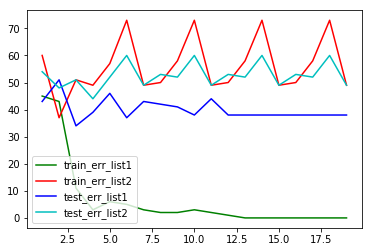

In [62]:
from matplotlib import pyplot as plt
ax=plt.gca()
ax.plot(index,train_err_list1[1:20],"g",label="train_err_list1")
ax.plot(index,train_err_list2[1:20],"r",label="train_err_list2")
ax.plot(index,test_err_list1[1:20],"b",label="test_err_list1")
ax.plot(index,test_err_list2[1:20],"c",label="test_err_list2")
plt.legend()
plt.show()

Based on the graph, we can see that the first algrithm which updates the coefficients with each misclassified sample has better peroormance.
With enough amount of training data, the err_rate will goes to 0.
The best max number of epoch is four with the lowest err_rate on test data.

In [98]:
train_err,test_err,coef=precrpton(4,0.05)

coef=numpy.array(coef)
import heapq
positive_words=heapq.nlargest(5, xrange(len(coef[0])), coef.take)
print "the 5 most negative words are:"
for i in positive_words:
    print class_vote.items()[i]
    
negative_words=heapq.nsmallest(5, xrange(len(coef[0])), coef.take)
print "the 5 most negative words are:"
for i in negative_words:
    print class_vote.items()[i]

the 5 most negative words are:
('wrote', 1188)
('which', 2153)
('copyright', 375)
('date', 966)
('ll', 917)
the 5 most negative words are:
('sight', 158)
('remov', 1510)
('click', 1846)
('deathtospamdeathtospamdeathtospam', 116)
('market', 1141)
